In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
print('Successfull')

Successfull


In [23]:
df=pd.read_csv('weight.csv')

In [24]:
df.head()

,weight,height
0,45,130
1,55,140
2,65,150
3,75,160
4,85,170


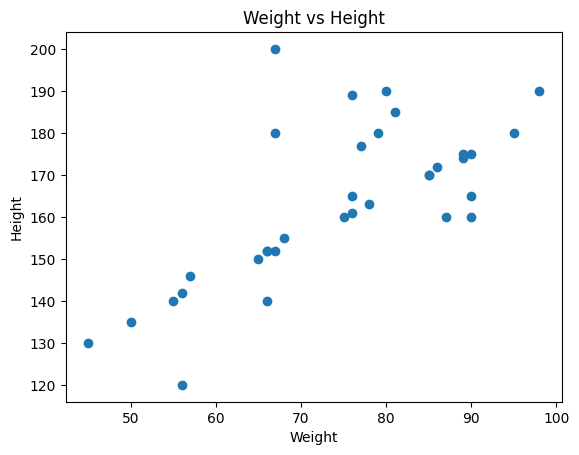

In [25]:
plt.scatter(df.weight, df.height)
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [26]:
# Co-relation
df.corr()

,weight,height
weight,1.000000,0.703765
height,0.703765,1.000000


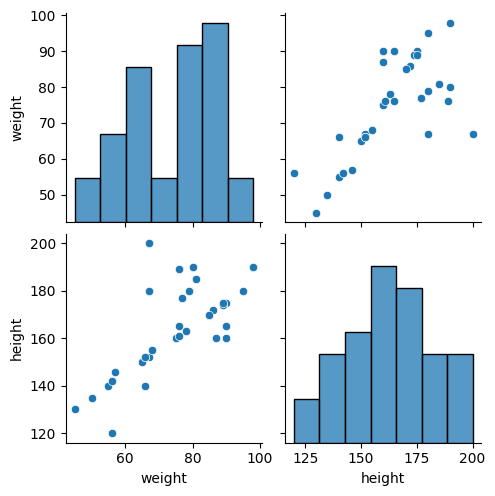

In [27]:
sns.pairplot(df)

<Axes: >

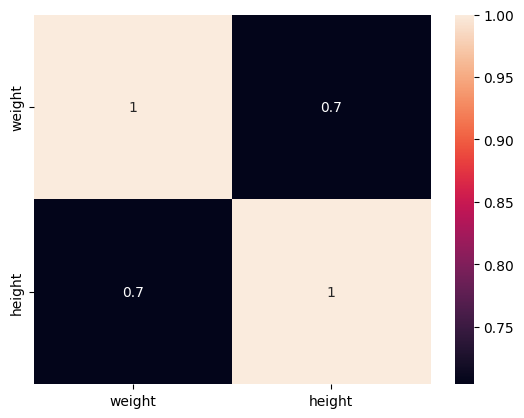

In [28]:
sns.heatmap(df.corr(), annot=True)

In [29]:
# Independent and Dependent
x=df[['weight']] # keep in mind that the independent varaible must be a two-dimensional array i.e, in the form of Data Frame
y=df.height # but we should keep the dependent value as a single dimension, ie., Series or 1-D array

In [30]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=42)

#### Standardization
it is neccessary because Standardization is important in machine learning because it improves model performance and accuracy, and makes it easier to compare different features. Standardized data centers the distribution around zero, which can speed up the learning process. It also ensures features have the same scale, which enables fair comparisons across different types of data

###### It is done using z-score 

In [38]:
scaler = StandardScaler()

In data processing, fit_transform() is used on training data to learn and scale the data, while transform() is used on test data to apply the learned scaling. This ensures both training and test data use the same scale, while keeping the test data unknown to the model.
Here's a breakdown of the differences: 
#### fit_transform()
Used on training data to learn scaling parameters, calculate feature means and variances, and scale the data. It combines the fit and transform steps into one. 
#### transform()
Used on test data to transform features using the means and variances calculated from the training data. This prevents the model from being biased by the test data and keeps the test data a surprise for the model. 
Using fit and transform separately can reduce model efficiency, 

###### so fit_transform() is a convenient option to combine both tasks

In [40]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

Data leakage in machine learning occurs when information from outside the training dataset is used to create the model, leading to overly optimistic performance estimates and poor generalization to new, unseen data. This happens when the model inadvertently has access to data that it shouldn't have during the training process, allowing it to "cheat" in making predictions.

In [42]:
X_test

array([[ 0.72106889],
       [ 1.09352182],
       [ 0.87005006],
       [-1.43915815],
       [-1.43915815],
       [ 0.12514419],
       [ 0.0506536 ],
       [-0.69425227],
       [-1.36466756]])

### Applying Linear Regression

In [43]:
reg=LinearRegression()

In [45]:
reg.fit(X_train, y_train)

LinearRegression()

In [47]:
print(f"The coefficient or Slope : {reg.coef_}")
print(f"The intercept of the regression is : {reg.intercept_}")

The coefficient or Slope : [12.73646023]
The intercept of the regression is : 165.56


 ### Plotting Training Data plot fit line

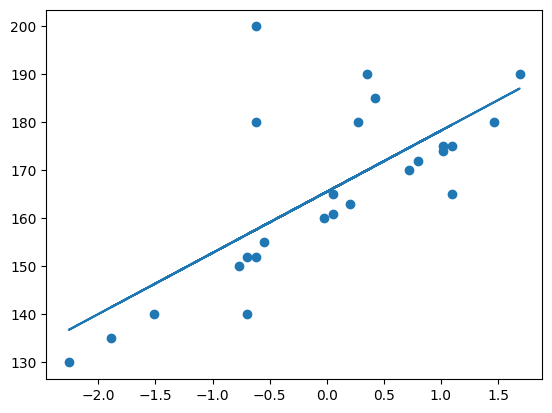

In [49]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train))

### Prediction for Test Data
1.  Predicted height output = intercept + coef_(weights)
2.  y_pred_test = 165.56 + 12.73(X_test)

In [57]:
y_pred=reg.predict(X_test)

In [58]:
y_pred.shape

(9,)

#### Performance Matrics

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)

In [60]:
print(mse)
print(mae)
print(rmse)

232.40011983392665
12.541207468699573
15.244675130481681


### R Square

Formula 

#### R^2 = 1 - SSR/SST
R^2 = coefficient of determination <br>
SSR=sum of squares of residuals <br>
SST = total sum of squares <br>

In [61]:
from sklearn.metrics import r2_score

In [62]:
score=r2_score(y_test, y_pred)
score

0.37564146910288354

#### Adjusted R2=1-[(1-R2)*(n-1)/(n-k-1)]
where <br>
R2 : The R2 of the model <br>
n : The number of observations <br>
k : The number of predictor variables <br>

In [64]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1])

0.37564146910288354